In [1]:
from matplotlib import pyplot as plt
from skimage import io
import numpy as np
import os
import keras

2023-08-17 08:05:50.279830: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
base_path = 'lr_observer/F-actin/unet/scaleNone/'

if 'F-actin' in base_path:
    num_batches = 47
elif 'MT' in base_path:
    num_batches = 40
elif 'ER' in base_path:
    num_batches = 36

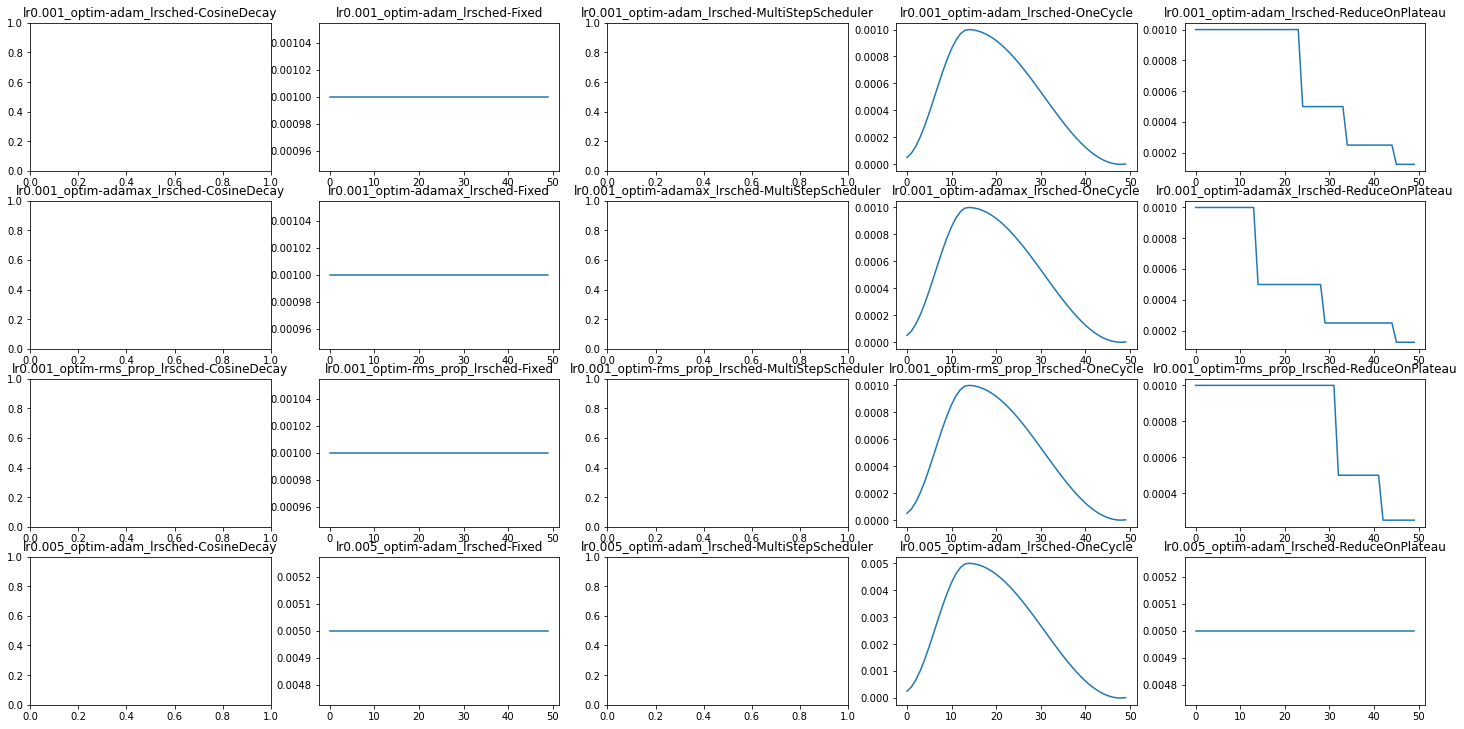

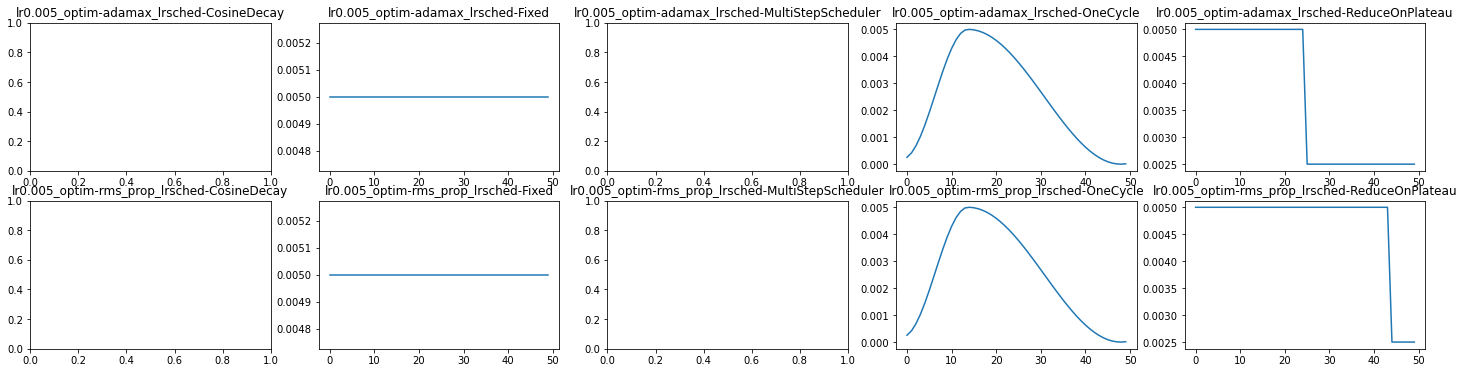

In [6]:

num_epochs = 50

columns = 5
list_of_folders = sorted([e for e in os.listdir(base_path) if 'epc'+str(num_epochs) in e])

plt.figure(figsize=(5 * columns, (len(list_of_folders)//columns + 1) * 6))
for i, folder in enumerate(list_of_folders):
    folder_path = os.path.join(base_path, folder, 'train_metrics')
    plt.subplot(len(os.listdir(base_path))//columns+1, columns, i+1)
    plt.title(folder[folder.find('lr'):folder.find('_seed')])
    try:
        lr = np.load(os.path.join(folder_path, 'lr.npy'), allow_pickle=True)
        if not isinstance(lr[0], np.float32):
            lr_schedule = lr[0]
            lr = [lr_schedule(step) for step in range(0, num_batches*num_epochs, num_batches)]
        plt.plot(lr)
    except :
        pass

    if (i+1)%20 == 0:
        plt.show()
        plt.figure(figsize=(5 * columns, (len(list_of_folders)//columns + 1) * 6))

plt.show()

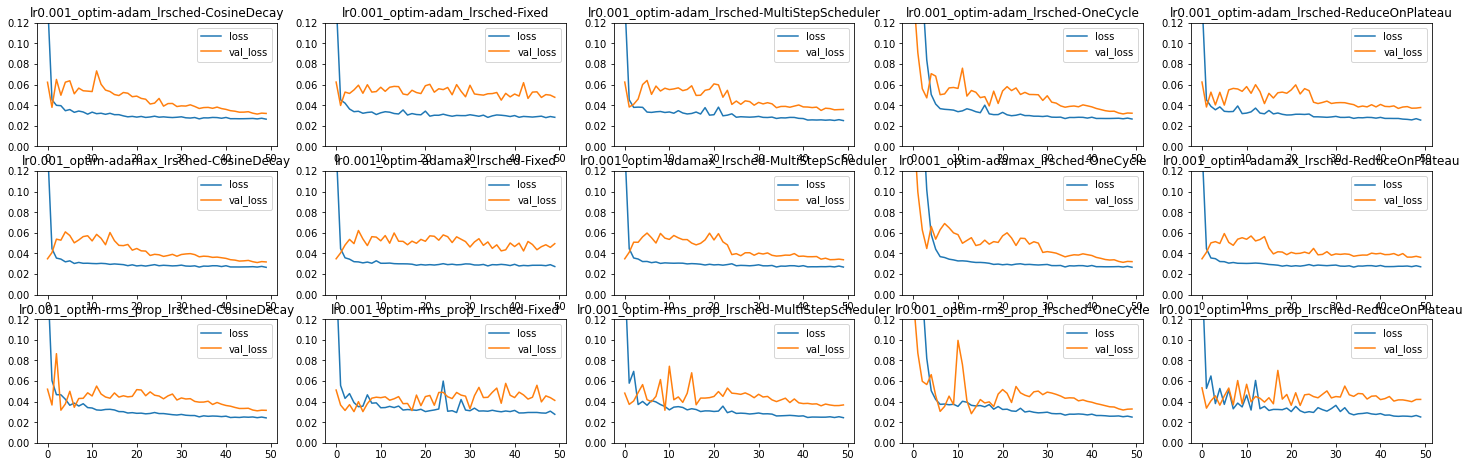

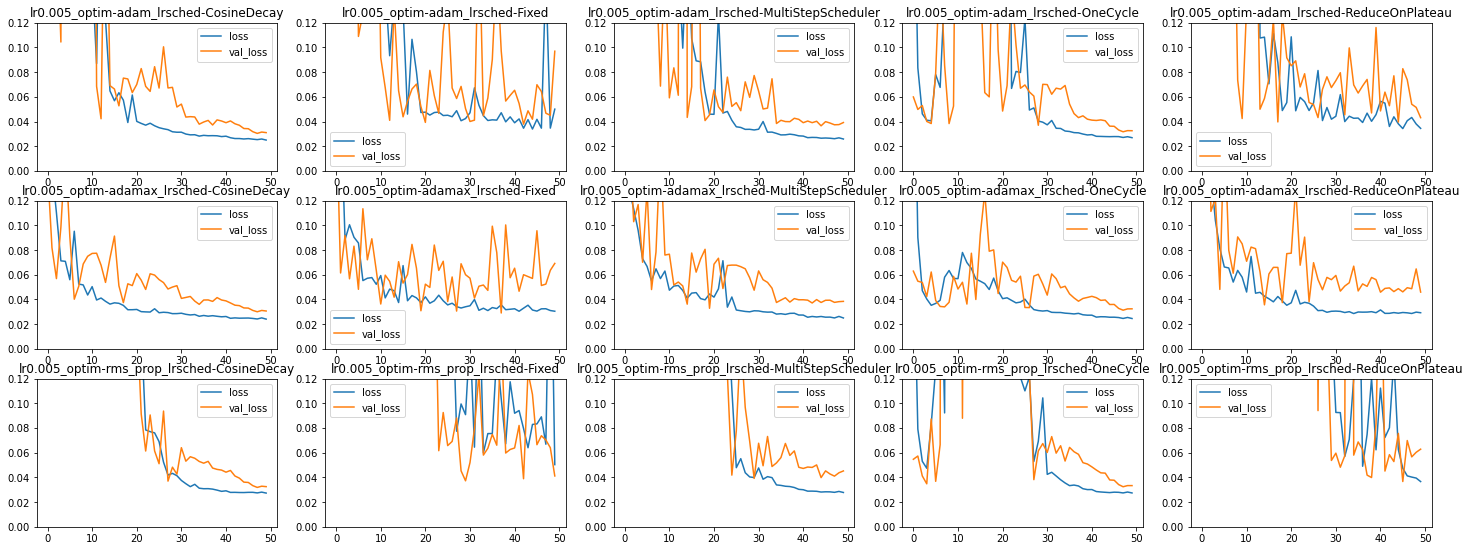

<Figure size 1800x3024 with 0 Axes>

In [12]:
columns = 5

list_of_folders = sorted([e for e in os.listdir(base_path) if 'epc'+str(num_epochs) in e])

plt.figure(figsize=(5 * columns, (len(list_of_folders)//columns + 1) * 5))
for i, folder in enumerate(sorted(list_of_folders)):
    folder_path = os.path.join(base_path, folder, 'train_metrics')
    plt.subplot(len(os.listdir(base_path))//columns+1, columns, i+1)
    plt.title(folder[folder.find('lr'):folder.find('_seed')])
    try:
        loss = np.load(os.path.join(folder_path, 'loss.npy'), allow_pickle=True)
        val_loss = np.load(os.path.join(folder_path, 'val_loss.npy'), allow_pickle=True)
        
        plt.plot(loss, label = 'loss')
        plt.plot(val_loss, label='val_loss')
        plt.ylim((0, 0.12))
        plt.legend()
    except :
        pass
    
    if (i+1)%15 == 0:
        plt.show()
        plt.figure(figsize=(5 * columns, (len(list_of_folders)//columns + 1) * 6))
plt.show()

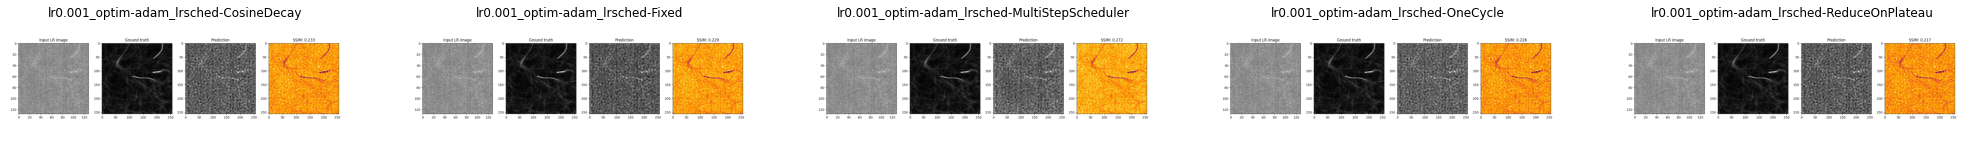

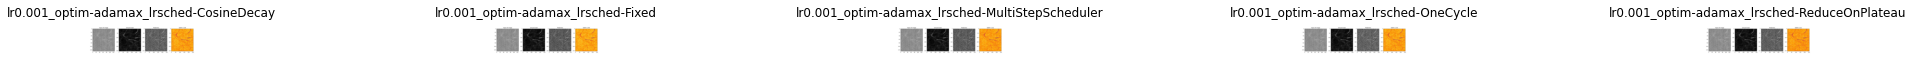

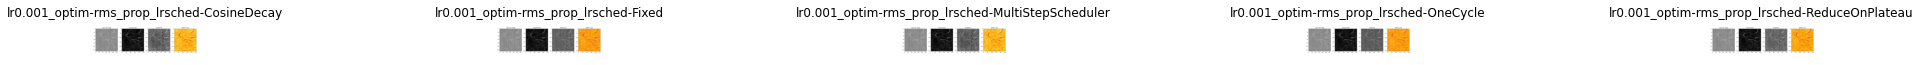

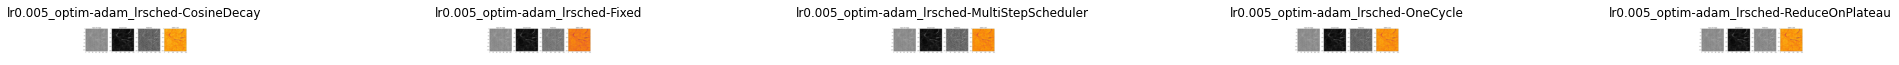

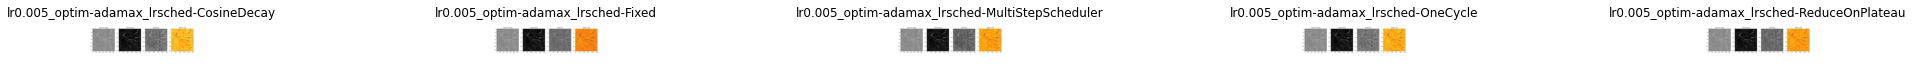

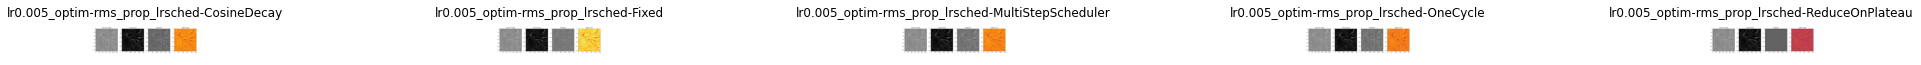

<Figure size 2520x720 with 0 Axes>

In [24]:
columns = 5
list_of_folders = sorted([e for e in os.listdir(base_path) if 'epc'+str(num_epochs) in e])

plt.figure(figsize=((len(list_of_folders)//columns + 1) * 5, 50))
for i, folder in enumerate(sorted(list_of_folders)):
    folder_path = os.path.join(base_path, folder, 'training_images')
    plt.subplot(len(os.listdir(base_path))//columns+1, columns, i+1)
    plt.title(folder[folder.find('lr'):folder.find('_seed')])
    plt.imshow(io.imread(os.path.join(folder_path, '40.png')))
    plt.axis('off')
    if (i+1)%columns == 0:
        plt.show()
        plt.figure(figsize=((len(list_of_folders)//columns + 1) * 5, 50))